In [1]:
#Go to Runtime and Press Runall.
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/2024 CAS East Asia Summer Program Dataset.xlsx - Dataset for Student.csv'
df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb,ClaimAmount
0,1,h,7,55,"Renault, Nissan or Citroen",Diesel,Centre,67,0,0
1,2,d,10,71,"Renault, Nissan or Citroen",Regular,Centre,91,0,0
2,3,g,25,87,"Renault, Nissan or Citroen",Regular,Centre,18,0,0
3,4,h,9,56,Fiat,Diesel,Aquitaine,272,1,1147
4,5,d,10,63,"Renault, Nissan or Citroen",Regular,Centre,10,0,0


# Modeling Severity

In [2]:
severity_data = df[df['ClaimNb'] > 0].copy()

# Calculate AverageClaimAmount
severity_data['Severity'] = severity_data['ClaimAmount'] / severity_data['ClaimNb']



In [3]:
severity_data.head()

,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb,ClaimAmount,Severity
3,4,h,9,56,Fiat,Diesel,Aquitaine,272,1,1147,1147.0
54,55,d,13,36,"Renault, Nissan or Citroen",Regular,Bretagne,229,1,1163,1163.0
98,99,f,2,73,"Renault, Nissan or Citroen",Diesel,Centre,105,1,1038,1038.0
101,102,e,7,61,"Renault, Nissan or Citroen",Regular,Bretagne,461,1,1152,1152.0
107,108,g,8,53,"Renault, Nissan or Citroen",Regular,Centre,121,1,78,78.0


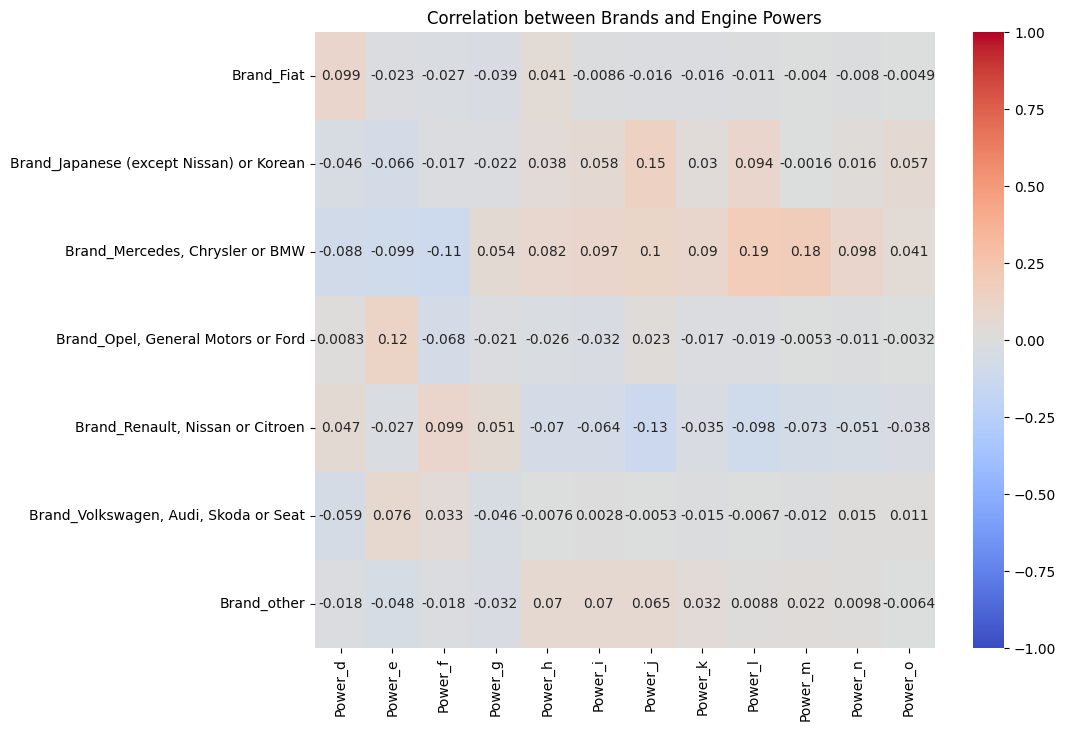

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df_encoded = pd.get_dummies(df, columns=['Brand', 'Power', 'Gas', 'Region'])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the relevant part of the correlation matrix
brands = [col for col in df_encoded.columns if col.startswith('Brand_')]
powers = [col for col in df_encoded.columns if col.startswith('Power_')]
correlation_matrix = correlation_matrix.loc[brands, powers]

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Brands and Engine Powers')
plt.show()

# Display the correlation matrix
# One-Hot Encode the categorical variables


##Seems like Brands and Engine powers aren't that correlated (can treat them indepdendetly)

In [5]:
correlation = df['CarAge'].corr(df['DriverAge'])
correlation
#CarAge has nothing to do with driver age

-0.003127587266912393

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# Assuming severity_data is the dataframe with 5000 entries


# Perform one-hot encoding on categorical variables
severity_data_encoded = pd.get_dummies(severity_data, columns=['Power', 'Brand', 'Gas','Region'])

# Define the independent variables (X) and the dependent variable (y)
X = severity_data_encoded.drop(['Severity','ClaimAmount','PolicyID'], axis=1)
y = severity_data_encoded['Severity']

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
importance_df



,Feature,Importance
1,DriverAge,0.243505
2,Density,0.199785
0,CarAge,0.144961
10,Power_j,0.097542
20,"Brand_Renault, Nissan or Citroen",0.049720
28,Region_Centre,0.039184
4,Power_d,0.035477
27,Region_Bretagne,0.031732
24,Gas_Regular,0.029289
23,Gas_Diesel,0.026266


In [7]:
total_policies = len(df)
total_claims = df['ClaimNb'].sum()
claim_frequency = total_claims / total_policies

# Calculate average severity
total_claim_amount = df['ClaimAmount'].sum()
average_severity = total_claim_amount / total_claims

# Calculate price for each policy to achieve 10% expected profit
expected_claim_cost = df['ClaimAmount'].mean()  # Mean claim amount per policy
price_per_policy = expected_claim_cost *1.1  # 10% profit implies price is 110% of the cost

# Display the results
print(f"Claim Frequency: {claim_frequency}")
print(f"Average Severity: {average_severity}")
print(f"Price per Policy for 10% Profit: {price_per_policy}")

Claim Frequency: 0.0506284884918964
Average Severity: 1503.0083171120157
Price per Policy for 10% Profit: 83.70454321474328


Driver Age, Density and CarAge really important

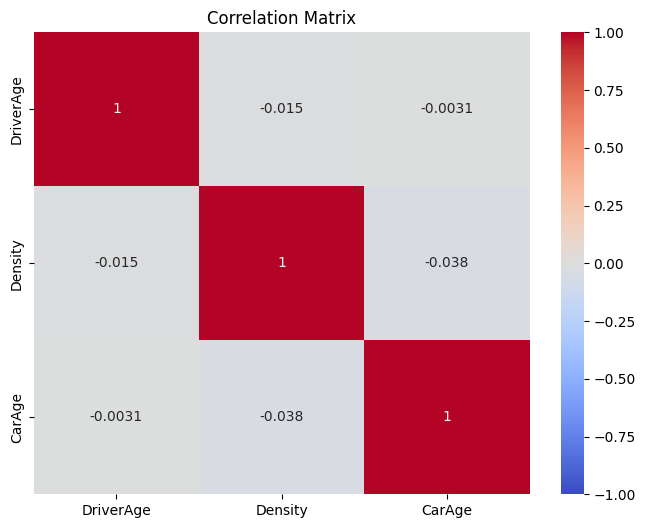

           DriverAge   Density    CarAge
DriverAge   1.000000 -0.014639 -0.003128
Density    -0.014639  1.000000 -0.037895
CarAge     -0.003128 -0.037895  1.000000


In [8]:
correlation_matrix = df[['DriverAge', 'Density', 'CarAge']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)     ##Weak correlation (so indepdent)

In [9]:
severity_data.head()

,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb,ClaimAmount,Severity
3,4,h,9,56,Fiat,Diesel,Aquitaine,272,1,1147,1147.0
54,55,d,13,36,"Renault, Nissan or Citroen",Regular,Bretagne,229,1,1163,1163.0
98,99,f,2,73,"Renault, Nissan or Citroen",Diesel,Centre,105,1,1038,1038.0
101,102,e,7,61,"Renault, Nissan or Citroen",Regular,Bretagne,461,1,1152,1152.0
107,108,g,8,53,"Renault, Nissan or Citroen",Regular,Centre,121,1,78,78.0


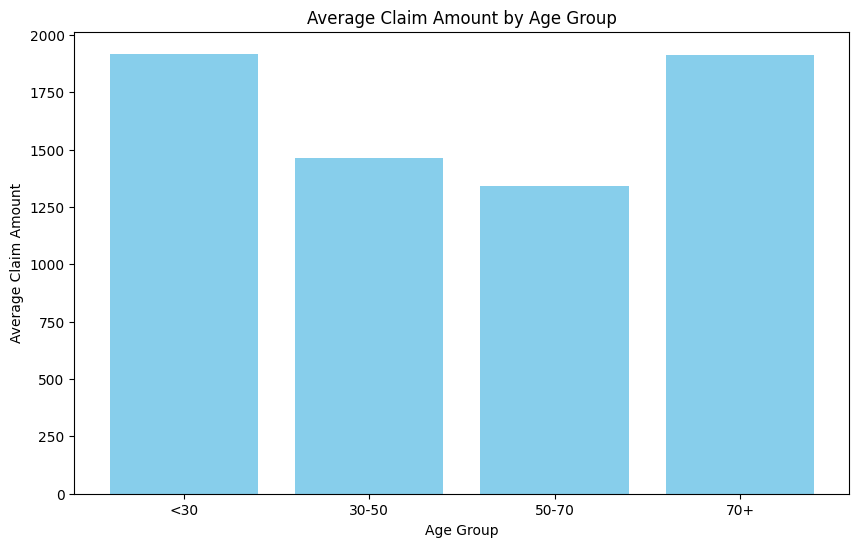

  AgeGroup     Severity
0      <30  1918.376940
1    30-50  1462.930873
2    50-70  1339.863121
3      70+  1912.252967


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Binning the ages
bins = [0, 30, 50, 70, 100]
labels = ['<30', '30-50', '50-70', '70+']
severity_data['AgeGroup'] = pd.cut(severity_data['DriverAge'], bins=bins, labels=labels, right=False)

# Calculating the average claim amount for each age group
average_claim_per_age_group = severity_data.groupby('AgeGroup')['Severity'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(average_claim_per_age_group['AgeGroup'], average_claim_per_age_group['Severity'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Claim Amount')
plt.title('Average Claim Amount by Age Group')
plt.show()

# Displaying the average claim amount per age group
print(average_claim_per_age_group)



In [11]:
severity_data['Density'].describe()

count     5414.000000
mean      1528.682859
std       4189.087049
min          3.000000
25%         62.000000
50%        229.000000
75%       1165.000000
max      27000.000000
Name: Density, dtype: float64

In [12]:
severity_data['AgeGroup'].value_counts()

AgeGroup
30-50    2493
50-70    1852
70+       618
<30       451
Name: count, dtype: int64

In [13]:
severity_data.head()

,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb,ClaimAmount,Severity,AgeGroup
3,4,h,9,56,Fiat,Diesel,Aquitaine,272,1,1147,1147.0,50-70
54,55,d,13,36,"Renault, Nissan or Citroen",Regular,Bretagne,229,1,1163,1163.0,30-50
98,99,f,2,73,"Renault, Nissan or Citroen",Diesel,Centre,105,1,1038,1038.0,70+
101,102,e,7,61,"Renault, Nissan or Citroen",Regular,Bretagne,461,1,1152,1152.0,50-70
107,108,g,8,53,"Renault, Nissan or Citroen",Regular,Centre,121,1,78,78.0,50-70


In [14]:
def categorize_density(density):
    if density < 100:
        return 'low'
    elif 100 <= density <= 1000:
        return 'medium'
    else:
        return 'high'

# Apply the function to the Density column to create a new column
severity_data['Density_Category'] = severity_data['Density'].apply(categorize_density)

severity_data['Density_Category'].value_counts()

Density_Category
medium    2104
low       1844
high      1466
Name: count, dtype: int64

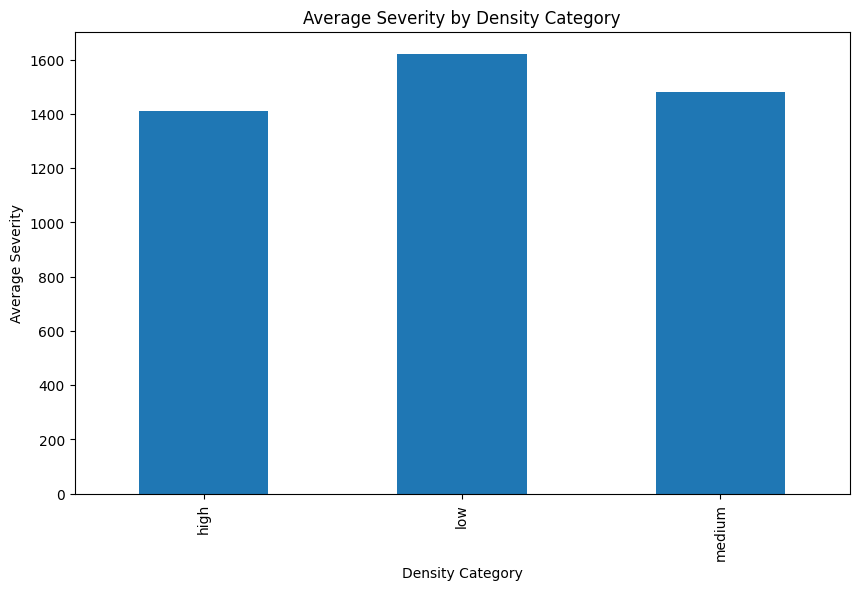

In [15]:
severity_data.head()
plt.figure(figsize=(10, 6))
severity_data.groupby('Density_Category')['Severity'].mean().plot(kind='bar')
plt.xlabel('Density Category')
plt.ylabel('Average Severity')
plt.title('Average Severity by Density Category')
plt.show()


In [16]:
severity_data.head()

,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb,ClaimAmount,Severity,AgeGroup,Density_Category
3,4,h,9,56,Fiat,Diesel,Aquitaine,272,1,1147,1147.0,50-70,medium
54,55,d,13,36,"Renault, Nissan or Citroen",Regular,Bretagne,229,1,1163,1163.0,30-50,medium
98,99,f,2,73,"Renault, Nissan or Citroen",Diesel,Centre,105,1,1038,1038.0,70+,medium
101,102,e,7,61,"Renault, Nissan or Citroen",Regular,Bretagne,461,1,1152,1152.0,50-70,medium
107,108,g,8,53,"Renault, Nissan or Citroen",Regular,Centre,121,1,78,78.0,50-70,medium


In [17]:
severity_data['CarAge'].describe()

count    5414.000000
mean        7.885667
std         5.041088
min         0.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        99.000000
Name: CarAge, dtype: float64

In [18]:
def categorize_car_age(car_age):
    if car_age < 18:
        return '<18 years'
    else:
        return '18+'

# Apply the function to the CarAge column to create a new column
severity_data['CarAge_Category'] = severity_data['CarAge'].apply(categorize_car_age)

# Display the updated DataFrame
print(severity_data.head())

     PolicyID Power  CarAge  DriverAge                       Brand      Gas  \
3           4     h       9         56                        Fiat   Diesel   
54         55     d      13         36  Renault, Nissan or Citroen  Regular   
98         99     f       2         73  Renault, Nissan or Citroen   Diesel   
101       102     e       7         61  Renault, Nissan or Citroen  Regular   
107       108     g       8         53  Renault, Nissan or Citroen  Regular   

        Region  Density  ClaimNb  ClaimAmount  Severity AgeGroup  \
3    Aquitaine      272        1         1147    1147.0    50-70   
54    Bretagne      229        1         1163    1163.0    30-50   
98      Centre      105        1         1038    1038.0      70+   
101   Bretagne      461        1         1152    1152.0    50-70   
107     Centre      121        1           78      78.0    50-70   

    Density_Category CarAge_Category  
3             medium       <18 years  
54            medium       <18 years  

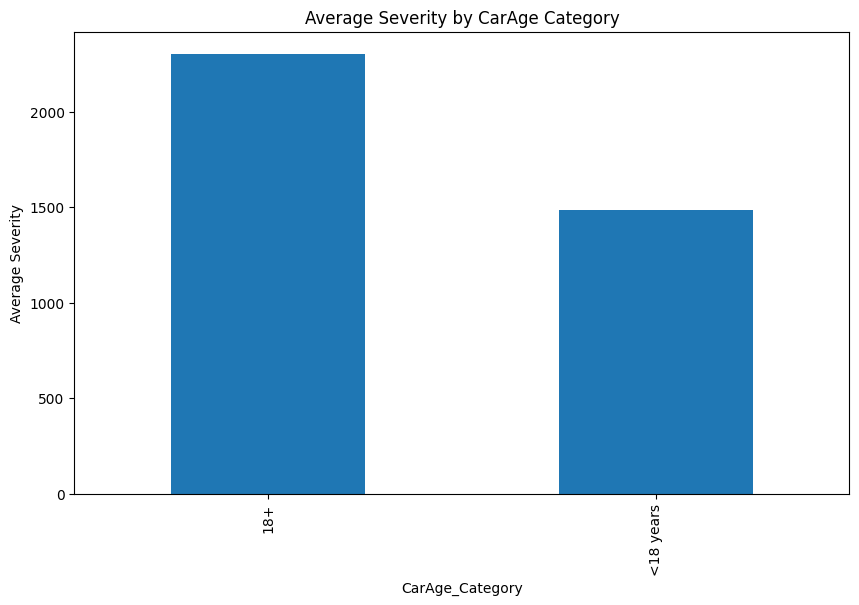

CarAge_Category
<18 years    5248
18+           166
Name: count, dtype: int64

In [19]:
plt.figure(figsize=(10, 6))
severity_data.groupby('CarAge_Category')['Severity'].mean().plot(kind='bar')
plt.xlabel('CarAge_Category')
plt.ylabel('Average Severity')
plt.title('Average Severity by CarAge Category')
plt.show()
severity_data['CarAge_Category'].value_counts()

In [20]:
severity_data.head()

,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb,ClaimAmount,Severity,AgeGroup,Density_Category,CarAge_Category
3,4,h,9,56,Fiat,Diesel,Aquitaine,272,1,1147,1147.0,50-70,medium,<18 years
54,55,d,13,36,"Renault, Nissan or Citroen",Regular,Bretagne,229,1,1163,1163.0,30-50,medium,<18 years
98,99,f,2,73,"Renault, Nissan or Citroen",Diesel,Centre,105,1,1038,1038.0,70+,medium,<18 years
101,102,e,7,61,"Renault, Nissan or Citroen",Regular,Bretagne,461,1,1152,1152.0,50-70,medium,<18 years
107,108,g,8,53,"Renault, Nissan or Citroen",Regular,Centre,121,1,78,78.0,50-70,medium,<18 years


In [21]:
def categorize_power(power):
    if power in ['m', 'j']:
        return 'm and j'
    else:
        return 'other'

# Apply the function to the Power column to create a new column
severity_data['Power_Group'] = severity_data['Power'].apply(categorize_power)

# Display the updated DataFrame
print(severity_data.head())

     PolicyID Power  CarAge  DriverAge                       Brand      Gas  \
3           4     h       9         56                        Fiat   Diesel   
54         55     d      13         36  Renault, Nissan or Citroen  Regular   
98         99     f       2         73  Renault, Nissan or Citroen   Diesel   
101       102     e       7         61  Renault, Nissan or Citroen  Regular   
107       108     g       8         53  Renault, Nissan or Citroen  Regular   

        Region  Density  ClaimNb  ClaimAmount  Severity AgeGroup  \
3    Aquitaine      272        1         1147    1147.0    50-70   
54    Bretagne      229        1         1163    1163.0    30-50   
98      Centre      105        1         1038    1038.0      70+   
101   Bretagne      461        1         1152    1152.0    50-70   
107     Centre      121        1           78      78.0    50-70   

    Density_Category CarAge_Category Power_Group  
3             medium       <18 years       other  
54            

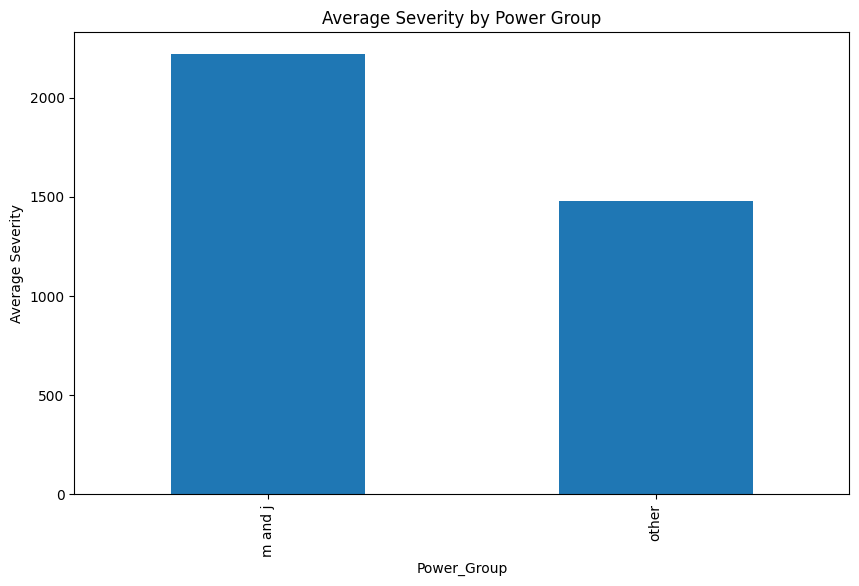

Power_Group
other      5168
m and j     246
Name: count, dtype: int64

In [22]:
plt.figure(figsize=(10, 6))
severity_data.groupby('Power_Group')['Severity'].mean().plot(kind='bar')
plt.xlabel('Power_Group')
plt.ylabel('Average Severity')
plt.title('Average Severity by Power Group')
plt.show()
severity_data['Power_Group'].value_counts()

Percentage of data with Severity between 50 and 3500: 98.34%


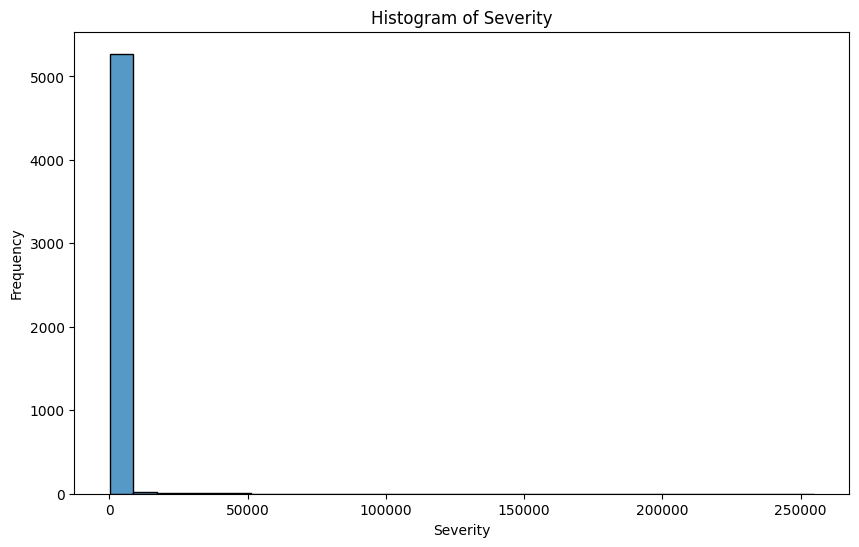

<ipython-input-23-c96c8cfadc69>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_severity_data['Severity'], shade=True)


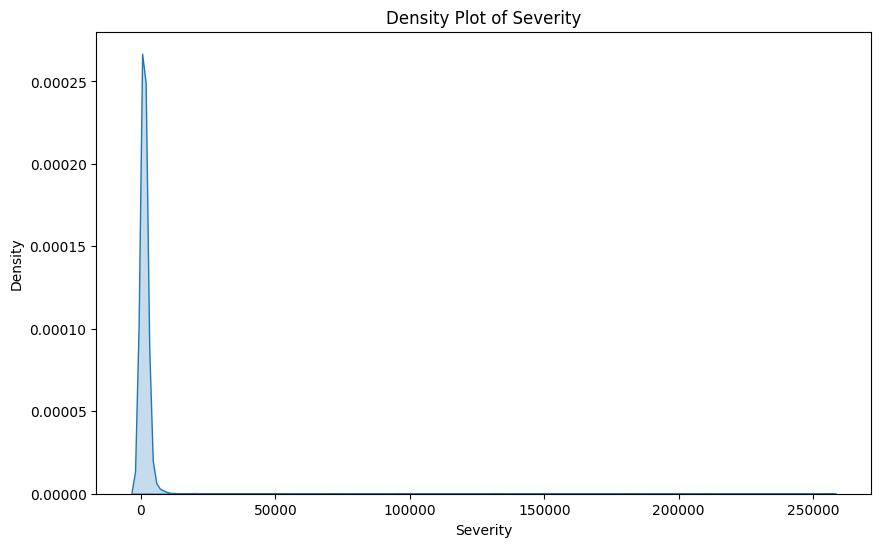

In [23]:
##Filtering data (outliers)


severity_data['Severity'].describe()


new_severity_data = severity_data[(severity_data['Severity'] > 50) & (severity_data['Severity'] <= 300000)]

percentage_within_range = (len(new_severity_data) / len(severity_data)) * 100
print(f"Percentage of data with Severity between 50 and 3500: {percentage_within_range:.2f}%")


new_severity_data['Severity'].describe()
plt.figure(figsize=(10, 6))
sns.histplot(new_severity_data['Severity'], bins=30, kde=False)
plt.title('Histogram of Severity')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

# Plot the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(new_severity_data['Severity'], shade=True)
plt.title('Density Plot of Severity')
plt.xlabel('Severity')
plt.ylabel('Density')
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Display the first few rows of the severity data
print(severity_data.head())

# Define features (X) and target (Y)
X = new_severity_data[['AgeGroup', 'Density_Category', 'CarAge_Category', 'Power_Group']]
Y = new_severity_data['Severity']

# Ensure the categorical columns are of type 'category'
X['AgeGroup'] = X['AgeGroup'].astype('category')
X['Density_Category'] = X['Density_Category'].astype('category')
X['CarAge_Category'] = X['CarAge_Category'].astype('category')
X['Power_Group'] = X['Power_Group'].astype('category')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create LightGBM datasets with categorical features specified
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=['AgeGroup', 'Density_Category', 'CarAge_Category', 'Power_Group'])
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train, categorical_feature=['AgeGroup', 'Density_Category', 'CarAge_Category', 'Power_Group'])


# Define parameter grid
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.01],
    'feature_fraction': [0.8, 0.7]
}

# Perform grid search with cross-validation
gbm = lgb.LGBMRegressor(objective='gamma', metric='rmse', boosting_type='gbdt', early_stopping_rounds=100)
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, verbose=3)

# Train the model
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse')

# Best parameters
print(f"Best parameters found by grid search: {grid_search.best_params_}")

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate deviance
def deviance(y_true, y_pred):
    return 2 * np.mean(np.log(y_pred / y_true) + (y_true / y_pred) - 1)

deviance_score = deviance(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Deviance: {deviance_score}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Create a new DataFrame with test data and predictions
X_test['Severity_True'] = y_test.values
X_test['Severity_Pred'] = y_pred

# Optionally reset index to maintain consistency
X_test.reset_index(drop=True, inplace=True)

# Show the new DataFrame
print(X_test.head())


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


     PolicyID Power  CarAge  DriverAge                       Brand      Gas  \
3           4     h       9         56                        Fiat   Diesel   
54         55     d      13         36  Renault, Nissan or Citroen  Regular   
98         99     f       2         73  Renault, Nissan or Citroen   Diesel   
101       102     e       7         61  Renault, Nissan or Citroen  Regular   
107       108     g       8         53  Renault, Nissan or Citroen  Regular   

        Region  Density  ClaimNb  ClaimAmount  Severity AgeGroup  \
3    Aquitaine      272        1         1147    1147.0    50-70   
54    Bretagne      229        1         1163    1163.0    30-50   
98      Centre      105        1         1038    1038.0      70+   
101   Bretagne      461        1         1152    1152.0    50-70   
107     Centre      121        1           78      78.0    50-70   

    Density_Category CarAge_Category Power_Group  
3             medium       <18 years       other  
54            

<ipython-input-24-bca4ca1159b6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AgeGroup'] = X['AgeGroup'].astype('category')
<ipython-input-24-bca4ca1159b6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Density_Category'] = X['Density_Category'].astype('category')
<ipython-input-24-bca4ca1159b6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [25]:
df.head()

# Apply the function to the CarAge column to create a new column
df['CarAge_Category'] = df['CarAge'].apply(categorize_car_age)
df['Power_Group'] = df['Power'].apply(categorize_power)
df['Density_Category'] = df['Density'].apply(categorize_density)
df['AgeGroup'] = pd.cut(df['DriverAge'], bins=bins, labels=labels, right=False)





df.head()

,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb,ClaimAmount,CarAge_Category,Power_Group,Density_Category,AgeGroup
0,1,h,7,55,"Renault, Nissan or Citroen",Diesel,Centre,67,0,0,<18 years,other,low,50-70
1,2,d,10,71,"Renault, Nissan or Citroen",Regular,Centre,91,0,0,<18 years,other,low,70+
2,3,g,25,87,"Renault, Nissan or Citroen",Regular,Centre,18,0,0,18+,other,low,70+
3,4,h,9,56,Fiat,Diesel,Aquitaine,272,1,1147,<18 years,other,medium,50-70
4,5,d,10,63,"Renault, Nissan or Citroen",Regular,Centre,10,0,0,<18 years,other,low,50-70


In [26]:

# Ensure the categorical columns in df are of type 'category'
df['AgeGroup'] = df['AgeGroup'].astype('category')
df['Density_Category'] = df['Density_Category'].astype('category')
df['CarAge_Category'] = df['CarAge_Category'].astype('category')
df['Power_Group'] = df['Power_Group'].astype('category')

# Predict using the trained model
df['Severity_Pred'] = grid_search.predict(df[['AgeGroup', 'Density_Category', 'CarAge_Category', 'Power_Group']]
)

# Show the DataFrame with predictions

print(df['Severity_Pred'].describe())
df.head()

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
count    111617.000000
mean       1588.034408
std          59.421572
min        1411.115841
25%        1556.473135
50%        1569.101823
75%        1609.055480
max        2090.308746
Name: Severity_Pred, dtype: float64


,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb,ClaimAmount,CarAge_Category,Power_Group,Density_Category,AgeGroup,Severity_Pred
0,1,h,7,55,"Renault, Nissan or Citroen",Diesel,Centre,67,0,0,<18 years,other,low,50-70,1609.055480
1,2,d,10,71,"Renault, Nissan or Citroen",Regular,Centre,91,0,0,<18 years,other,low,70+,1700.086455
2,3,g,25,87,"Renault, Nissan or Citroen",Regular,Centre,18,0,0,18+,other,low,70+,1610.878739
3,4,h,9,56,Fiat,Diesel,Aquitaine,272,1,1147,<18 years,other,medium,50-70,1568.901559
4,5,d,10,63,"Renault, Nissan or Citroen",Regular,Centre,10,0,0,<18 years,other,low,50-70,1609.055480


In [27]:
df = df.drop(columns=['CarAge_Category', 'Power_Group', 'Density_Category', 'AgeGroup'])
df.head()

,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb,ClaimAmount,Severity_Pred
0,1,h,7,55,"Renault, Nissan or Citroen",Diesel,Centre,67,0,0,1609.055480
1,2,d,10,71,"Renault, Nissan or Citroen",Regular,Centre,91,0,0,1700.086455
2,3,g,25,87,"Renault, Nissan or Citroen",Regular,Centre,18,0,0,1610.878739
3,4,h,9,56,Fiat,Diesel,Aquitaine,272,1,1147,1568.901559
4,5,d,10,63,"Renault, Nissan or Citroen",Regular,Centre,10,0,0,1609.055480


In [28]:
df['Severity_Pred'].describe()

count    111617.000000
mean       1588.034408
std          59.421572
min        1411.115841
25%        1556.473135
50%        1569.101823
75%        1609.055480
max        2090.308746
Name: Severity_Pred, dtype: float64

#Now modeling frequency

In [29]:

df.head()


,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb,ClaimAmount,Severity_Pred
0,1,h,7,55,"Renault, Nissan or Citroen",Diesel,Centre,67,0,0,1609.055480
1,2,d,10,71,"Renault, Nissan or Citroen",Regular,Centre,91,0,0,1700.086455
2,3,g,25,87,"Renault, Nissan or Citroen",Regular,Centre,18,0,0,1610.878739
3,4,h,9,56,Fiat,Diesel,Aquitaine,272,1,1147,1568.901559
4,5,d,10,63,"Renault, Nissan or Citroen",Regular,Centre,10,0,0,1609.055480


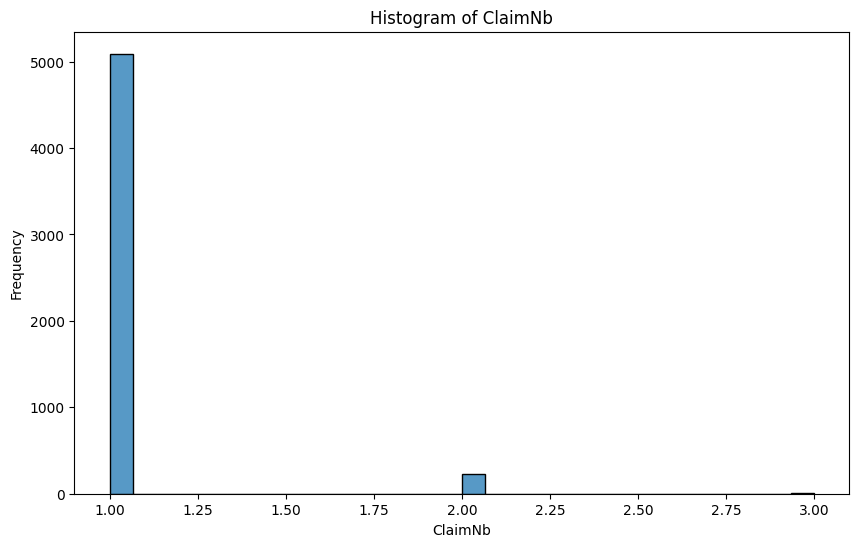

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(new_severity_data['ClaimNb'], bins=30, kde=False)
plt.title('Histogram of ClaimNb')
plt.xlabel('ClaimNb')
plt.ylabel('Frequency')
plt.show()

In [31]:
freq_data = df.drop(columns=['PolicyID','ClaimAmount', 'Severity_Pred']) # Remove extra brackets around column names
freq_data.head()

,Power,CarAge,DriverAge,Brand,Gas,Region,Density,ClaimNb
0,h,7,55,"Renault, Nissan or Citroen",Diesel,Centre,67,0
1,d,10,71,"Renault, Nissan or Citroen",Regular,Centre,91,0
2,g,25,87,"Renault, Nissan or Citroen",Regular,Centre,18,0
3,h,9,56,Fiat,Diesel,Aquitaine,272,1
4,d,10,63,"Renault, Nissan or Citroen",Regular,Centre,10,0


In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm
from statsmodels.discrete.count_model import ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP

# Load your data
# Assuming freq_data is already loaded as shown in your screenshot

# Define the formula for the model, using C() to denote categorical variables
formula = 'ClaimNb ~ C(Power) + CarAge + DriverAge + C(Brand) + C(Gas) + C(Region) + Density'

# Fit the Negative Binomial model
nb_model = glm(formula, data=freq_data, family=sm.families.NegativeBinomial()).fit()
print(nb_model.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               111617
Model:                            GLM   Df Residuals:                   111586
Model Family:        NegativeBinomial   Df Model:                           30
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22404.
Date:                Sun, 28 Jul 2024   Deviance:                       29550.
Time:                        16:38:35   Pearson chi2:                 1.09e+05
No. Iterations:                     7   Pseudo R-squ. (CS):           0.004400
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [33]:
# Fit the Zero-Inflated Poisson model
zip_model = ZeroInflatedPoisson.from_formula(formula, data=freq_data).fit()
print(zip_model.summary())


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/count_model.py:629: RuntimeWarning: overflow encountered in exp
  coeff = (1 + w[zero_idx] * (np.exp(mu[zero_idx]) - 1))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/count_model.py:637: RuntimeWarning: overflow encountered in exp
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/count_model.py:638: RuntimeWarning: overflow encountered in square
  coeff**2)).sum() - (mu[nonzero_idx] * self.exog[nonzero_idx, i] *
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/count_model.py:637: RuntimeWarning: invalid value encountered in divide
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /


         Current function value: 26.409331
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                 ClaimNb   No. Observations:               111617
Model:             ZeroInflatedPoisson   Df Residuals:                   111586
Method:                            MLE   Df Model:                           30
Date:                 Sun, 28 Jul 2024   Pseudo R-squ.:                  -129.2
Time:                         16:38:51   Log-Likelihood:            -2.9477e+06
converged:                       False   LL-Null:                       -22646.
Covariance Type:             nonrobust   LLR p-value:                     1.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
inflate_const                                      0.3435        nan        nan        nan         nan         nan
Intercept      

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# Assuming severity_data is the dataframe with 5000 entries

# Perform one-hot encoding on categorical variables
frequency_data_encoded = pd.get_dummies(freq_data, columns=['Power', 'Brand', 'Gas','Region'])

# Define the independent variables (X) and the dependent variable (y)
X = frequency_data_encoded.drop(['ClaimNb'], axis=1)
y = frequency_data_encoded['ClaimNb']

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
importance_df

KeyboardInterrupt: 

In [35]:
#Too see collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

df['CarAge_Category'] = df['CarAge'].apply(categorize_car_age)
df['Density_Category'] = df['Density'].apply(categorize_density)
df['AgeGroup'] = pd.cut(df['DriverAge'], bins=bins, labels=labels, right=False)

# Ensure the categorical columns are of type 'category'
df['AgeGroup'] = df['AgeGroup'].astype('category')
df['Density_Category'] = df['Density_Category'].astype('category')
df['CarAge_Category'] = df['CarAge_Category'].astype('category')

# Create the DataFrame with the desired columns
X = df[['AgeGroup', 'Density_Category', 'CarAge_Category']]

# Convert categorical columns to numeric codes
X = pd.get_dummies(X, drop_first=True)

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                     feature       VIF
0             AgeGroup_30-50  0.000098
1             AgeGroup_50-70  0.000103
2               AgeGroup_70+  0.000150
3       Density_Category_low  0.000061
4    Density_Category_medium  0.000063
5  CarAge_Category_<18 years  0.000086


In [ ]:
df.head()

In [ ]:
X.head()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = X.astype(int)

# Define target variable
y = df['ClaimNb']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Create a DataFrame to compare actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())




In [38]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Copy the CSV file to the Colab environment
!cp /content/drive/MyDrive/pricing_data.csv /content/pricing_data.csv

# Load the CSV file into a pandas DataFrame
pricing_data = pd.read_csv('/content/pricing_data.csv')

# Display the first few rows of the DataFrame
pricing_data.head()

pricing_data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density
0,1,g,8,73,"Renault, Nissan or Citroen",Regular,Centre,105
1,2,d,8,69,"Renault, Nissan or Citroen",Diesel,Bretagne,229
2,3,g,11,52,"Renault, Nissan or Citroen",Diesel,Centre,26
3,4,g,2,74,"Opel, General Motors or Ford",Regular,Centre,405
4,5,g,1,48,"Opel, General Motors or Ford",Regular,Centre,1313


In [39]:
pricing_data['CarAge_Category'] = pricing_data['CarAge'].apply(categorize_car_age)
pricing_data['Power_Group'] = pricing_data['Power'].apply(categorize_power)
pricing_data['Density_Category'] = pricing_data['Density'].apply(categorize_density)
pricing_data['AgeGroup'] = pd.cut(pricing_data['DriverAge'], bins=bins, labels=labels, right=False)

pricing_data['AgeGroup'] = pricing_data['AgeGroup'].astype('category')
pricing_data['Density_Category'] = pricing_data['Density_Category'].astype('category')
pricing_data['CarAge_Category'] = pricing_data['CarAge_Category'].astype('category')
pricing_data['Power_Group'] = pricing_data['Power_Group'].astype('category')


# Predict using the trained model
pricing_data['Severity_Pred'] = grid_search.predict(pricing_data[['AgeGroup', 'Density_Category', 'CarAge_Category', 'Power_Group']])

# Display the first few rows of the pricing_data with predictions
print(pricing_data.head())

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
   PolicyID Power  CarAge  DriverAge                         Brand      Gas  \
0         1     g       8         73    Renault, Nissan or Citroen  Regular   
1         2     d       8         69    Renault, Nissan or Citroen   Diesel   
2         3     g      11         52    Renault, Nissan or Citroen   Diesel   
3         4     g       2         74  Opel, General Motors or Ford  Regular   
4         5     g       1         48  Opel, General Motors or Ford  Regular   

     Region  Density CarAge_Category Power_Group Density_Category AgeGroup  \
0    Centre      105       <18 years       other           medium      70+   
1  Bretagne      229       <18 years       other           medium    50-70   
2    Centre       26       <18 years       other              low    50-70   
3    Centre      405       <18 years       other           medium      70+   
4    Centre

In [ ]:
pricing_data.head()

In [40]:
#Zero inflated poisson (hurdle model)

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, PoissonRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming categorize_car_age, categorize_density, bins, labels, and the models are already defined

# Prepare the training data
df['CarAge_Category'] = df['CarAge'].apply(categorize_car_age)
df['Density_Category'] = df['Density'].apply(categorize_density)
df['AgeGroup'] = pd.cut(df['DriverAge'], bins=bins, labels=labels, right=False)

# Define features (X) and target (Y)
X = df[['AgeGroup', 'Density_Category', 'CarAge_Category']]
Y = df['ClaimNb']

# Ensure the categorical columns are of type 'category'
X['AgeGroup'] = X['AgeGroup'].astype('category')
X['Density_Category'] = X['Density_Category'].astype('category')
X['CarAge_Category'] = X['CarAge_Category'].astype('category')

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X)

# Save the columns of the training data
train_columns = X_encoded.columns

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42)

# Stage 1: Hyperparameter Tuning for Logistic Regression
logit_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}
logit_grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), logit_param_grid, cv=5)
logit_grid_search.fit(X_train, (y_train > 0).astype(int))
best_logit_model = logit_grid_search.best_estimator_

# Predict the probability of non-zero
p_non_zero = best_logit_model.predict_proba(X_test)[:, 1]

# Stage 2: Hyperparameter Tuning for Poisson Regression
non_zero_idx = y_train > 0
poisson_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2]
}
poisson_grid_search = GridSearchCV(PoissonRegressor(), poisson_param_grid, cv=5)
poisson_grid_search.fit(X_train[non_zero_idx], y_train[non_zero_idx])
best_poisson_model = poisson_grid_search.best_estimator_

# Predict the counts using the tuned Poisson model
y_pred_non_zero = best_poisson_model.predict(X_test)

# Combine the two stages
y_pred = p_non_zero * y_pred_non_zero

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Create a DataFrame to compare actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# Prepare pricing_data
pricing_data['CarAge_Category'] = pricing_data['CarAge'].apply(categorize_car_age)
pricing_data['Density_Category'] = pricing_data['Density'].apply(categorize_density)
pricing_data['AgeGroup'] = pd.cut(pricing_data['DriverAge'], bins=bins, labels=labels, right=False)

# One-hot encoding for categorical variables
pricing_data_encoded = pd.get_dummies(pricing_data, columns=['AgeGroup', 'Density_Category', 'CarAge_Category'])

# Ensure consistency in columns between training data and pricing_data
for col in train_columns:
    if col not in pricing_data_encoded.columns:
        pricing_data_encoded[col] = 0
pricing_data_encoded = pricing_data_encoded[train_columns]

# Display the processed pricing_data_encoded to verify
print(pricing_data_encoded.head())

# Predict the probability of non-zero for pricing_data
pricing_p_non_zero = best_logit_model.predict_proba(pricing_data_encoded)[:, 1]

# Predict the counts using the tuned Poisson model
pricing_y_pred_non_zero = best_poisson_model.predict(pricing_data_encoded)

# Combine the two stages for pricing_data
pricing_data['Frequency'] = pricing_p_non_zero * pricing_y_pred_non_zero

# Display the first few rows of the pricing_data with predictions
print(pricing_data[['PolicyID', 'Frequency']].head())



<ipython-input-40-e8e0f5dba482>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AgeGroup'] = X['AgeGroup'].astype('category')
<ipython-input-40-e8e0f5dba482>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Density_Category'] = X['Density_Category'].astype('category')
<ipython-input-40-e8e0f5dba482>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Mean Squared Error: 0.052759996670326374
Mean Absolute Error: 0.09746654793641055
R^2 Score: 0.0016805306404854559
       Actual  Predicted
89473       0   0.062463
81547       0   0.053866
32809       0   0.062463
62073       0   0.062463
99018       0   0.053951
   AgeGroup_<30  AgeGroup_30-50  AgeGroup_50-70  AgeGroup_70+  \
0         False           False           False          True   
1         False           False            True         False   
2         False           False            True         False   
3         False           False           False          True   
4         False            True           False         False   

   Density_Category_high  Density_Category_low  Density_Category_medium  \
0                  False                 False                     True   
1                  False                 False                     True   
2                  False                  True                    False   
3                  False                 Fal

In [41]:
pricing_data['Frequency'].describe()

count    10000.000000
mean         0.051897
std          0.006823
min          0.044243
25%          0.044478
50%          0.053866
75%          0.054805
max          0.063526
Name: Frequency, dtype: float64

In [42]:
pricing_data

,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,CarAge_Category,Power_Group,Density_Category,AgeGroup,Severity_Pred,Frequency
0,1,g,8,73,"Renault, Nissan or Citroen",Regular,Centre,105,<18 years,other,medium,70+,1690.472161,0.054870
1,2,d,8,69,"Renault, Nissan or Citroen",Diesel,Bretagne,229,<18 years,other,medium,50-70,1568.901559,0.053866
2,3,g,11,52,"Renault, Nissan or Citroen",Diesel,Centre,26,<18 years,other,low,50-70,1609.055480,0.044406
3,4,g,2,74,"Opel, General Motors or Ford",Regular,Centre,405,<18 years,other,medium,70+,1690.472161,0.054870
4,5,g,1,48,"Opel, General Motors or Ford",Regular,Centre,1313,<18 years,other,high,30-50,1566.344517,0.062463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,f,7,31,"Renault, Nissan or Citroen",Diesel,Centre,30,<18 years,other,low,30-50,1556.473135,0.044478
9996,9997,d,14,55,Fiat,Diesel,Poitou-Charentes,93,<18 years,other,low,50-70,1609.055480,0.044406
9997,9998,d,12,50,"Renault, Nissan or Citroen",Regular,Centre,13,<18 years,other,low,50-70,1609.055480,0.044406
9998,9999,d,4,69,other,Regular,Ile-de-France,517,<18 years,other,medium,50-70,1568.901559,0.053866


In [47]:
#Premium is Frequency * Severity
pricing_data["premium"] = pricing_data["Severity_Pred"] * pricing_data["Frequency"]
pricing_data

,PolicyID,Power,CarAge,DriverAge,Brand,Gas,Region,Density,CarAge_Category,Power_Group,Density_Category,AgeGroup,Severity_Pred,Frequency,premium
0,1,g,8,73,"Renault, Nissan or Citroen",Regular,Centre,105,<18 years,other,medium,70+,1690.472161,0.054870,92.755570
1,2,d,8,69,"Renault, Nissan or Citroen",Diesel,Bretagne,229,<18 years,other,medium,50-70,1568.901559,0.053866,84.510518
2,3,g,11,52,"Renault, Nissan or Citroen",Diesel,Centre,26,<18 years,other,low,50-70,1609.055480,0.044406,71.450924
3,4,g,2,74,"Opel, General Motors or Ford",Regular,Centre,405,<18 years,other,medium,70+,1690.472161,0.054870,92.755570
4,5,g,1,48,"Opel, General Motors or Ford",Regular,Centre,1313,<18 years,other,high,30-50,1566.344517,0.062463,97.838097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,f,7,31,"Renault, Nissan or Citroen",Diesel,Centre,30,<18 years,other,low,30-50,1556.473135,0.044478,69.228953
9996,9997,d,14,55,Fiat,Diesel,Poitou-Charentes,93,<18 years,other,low,50-70,1609.055480,0.044406,71.450924
9997,9998,d,12,50,"Renault, Nissan or Citroen",Regular,Centre,13,<18 years,other,low,50-70,1609.055480,0.044406,71.450924
9998,9999,d,4,69,other,Regular,Ile-de-France,517,<18 years,other,medium,50-70,1568.901559,0.053866,84.510518
